<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [9]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print("valores:", values) #D
print("vectores:", vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= (W@D@Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
valores: [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
vectores: [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [24]:
#Matriz 1
Mat1 = array([[4.5, 3.8, 5.0], [1.5, 2.4, 3.7], [4.8, 4.3, 4.9]])
print("******* Matriz de notas (Original) ******* ")
print(Mat1, "\n")

#Obtenemos la descomposición eigen
ValsMat1, VecsMat1 = np.linalg.eig(Mat1)

#Obtenemos nuestra matriz inversa
Mat1Inv=np.linalg.inv(VecsMat1)

#Obtenemos nuestra diagonal
Mat1Diag=np.diag(ValsMat1)

#Imprimimos nuestro vector
print("******* Vector (W) *******")
print(VecsMat1, "\n")

#Imprimimos nuestra diagonal
print("******* Diagonal (D) *******")
print(Mat1Diag, "\n")

#Imprimimos la matriz inversa
print("******* Matriz de notas inversa (Winv) *******")
print(Mat1Inv, "\n")

#Obtenemos nuestra matriz reconstruida
Mat1Rec=(VecsMat1@Mat1Diag@Mat1Inv)

#Imprimimos la matriz de notas reconstruida
print("******* Matriz de notas reconstruida (W@D@Winv) *******")
print(Mat1Rec)
print("******* Igual a la matriz original *******")

******* Matriz de notas (Original) ******* 
[[4.5 3.8 5. ]
 [1.5 2.4 3.7]
 [4.8 4.3 4.9]] 

******* Vector (W) *******
[[-0.64513116 -0.57528434 -0.07498302]
 [-0.36509982  0.80222922 -0.75527592]
 [-0.67119886 -0.15961267  0.65110355]] 

******* Diagonal (D) *******
[[11.85257254  0.          0.        ]
 [ 0.          0.58818194  0.        ]
 [ 0.          0.         -0.64075447]] 

******* Matriz de notas inversa (Winv) *******
[[-0.54863065 -0.52781405 -0.67544283]
 [-1.01682397  0.64229379  0.62795619]
 [-0.8148293  -0.38665119  0.99350295]] 

******* Matriz de notas reconstruida (W@D@Winv) *******
[[4.5 3.8 5. ]
 [1.5 2.4 3.7]
 [4.8 4.3 4.9]]
******* Igual a la matriz original *******


In [27]:
#Matriz 2
Mat2 = array([[3500, 5000, 8000], [10000, 12000, 9500], [850, 1200, 900]])
print("******* Matriz de salarios en dolares (Original) ******* ")
print(Mat2, "\n")

#Obtenemos la descomposición eigen
ValsMat2, VecsMat2 = np.linalg.eig(Mat2)

#Obtenemos nuestra matriz inversa
Mat2Inv=np.linalg.inv(VecsMat2)

#Obtenemos nuestra diagonal
Mat2Diag=np.diag(ValsMat2)

#Imprimimos nuestro vector
print("******* Vector (W) *******")
print(VecsMat2, "\n")

#Imprimimos nuestra diagonal
print("******* Diagonal (D) *******")
print(Mat2Diag, "\n")

#Imprimimos la matriz inversa
print("******* Matriz de notas inversa (Winv) *******")
print(Mat2Inv, "\n")

#Obtenemos nuestra matriz reconstruida
Mat2Rec=(VecsMat2@Mat2Diag@Mat2Inv)

#Imprimimos la matriz de notas reconstruida
print("******* Matriz de salarios en dolares reconstruida (W@D@Winv) *******")
print(Mat2Rec)
print("******* Técnicamente igual a la matriz original, se dieron variaciones por decimales en los cálculos de descomposición y reconstrucción *******")

******* Matriz de salarios en dolares (Original) ******* 
[[ 3500  5000  8000]
 [10000 12000  9500]
 [  850  1200   900]] 

******* Vector (W) *******
[[ 0.38795691+0.j         -0.75726391+0.j         -0.75726391-0.j        ]
 [ 0.91745786+0.j          0.62469663+0.13202087j  0.62469663-0.13202087j]
 [ 0.08809378+0.j         -0.02407149-0.13526473j -0.02407149+0.13526473j]] 

******* Diagonal (D) *******
[[17140.79203834  +0.j             0.          +0.j
      0.          +0.j        ]
 [    0.          +0.j          -370.39601917+557.28723451j
      0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
   -370.39601917-557.28723451j]] 

******* Matriz de notas inversa (Winv) *******
[[ 0.60537418+3.02526981e-17j  0.76251859+3.02526981e-17j
   0.74423218-4.84043170e-16j]
 [-0.50520096-2.87035592e-01j  0.19532448-2.13542895e-01j
   0.19064029+3.48803331e+00j]
 [-0.50520096+2.87035592e-01j  0.19532448+2.13542895e-01j
   0.19064029-3.48803331e+00j]] 

******* Matr

In [31]:
#Matriz 3
Mat3 = array([[0.5, 0.3, 0.1, 0.6], [0.8, 0.9, 0.9, 0.4], [0.2, 0.7, 0.4, 0.5], [0.9, 0.8, 0.7, 0.6]])
print("******* Matriz de datos entre 0 y 1 de 4 dimensiones (Original) ******* ")
print(Mat3, "\n")

#Obtenemos la descomposición eigen
ValsMat3, VecsMat3 = np.linalg.eig(Mat3)

#Obtenemos nuestra matriz inversa
Mat3Inv=np.linalg.inv(VecsMat3)

#Obtenemos nuestra diagonal
Mat3Diag=np.diag(ValsMat3)

#Imprimimos nuestro vector
print("******* Vector (W) *******")
print(VecsMat3, "\n")

#Imprimimos nuestra diagonal
print("******* Diagonal (D) *******")
print(Mat3Diag, "\n")

#Imprimimos la matriz inversa
print("******* Matriz de notas inversa (Winv) *******")
print(Mat3Inv, "\n")

#Obtenemos nuestra matriz reconstruida
Mat3Rec=(VecsMat3@Mat3Diag@Mat3Inv)

#Imprimimos la matriz de notas reconstruida
print("******* Matriz de datos entre 0 y 1 de 4 dimensiones reconstruida (W@D@Winv) *******")
print(Mat3Rec)
print("******* Igual a la matriz original *******")

******* Matriz de datos entre 0 y 1 de 4 dimensiones (Original) ******* 
[[0.5 0.3 0.1 0.6]
 [0.8 0.9 0.9 0.4]
 [0.2 0.7 0.4 0.5]
 [0.9 0.8 0.7 0.6]] 

******* Vector (W) *******
[[-0.31914328 -0.34746367 -0.24442678  0.7218214 ]
 [-0.60246785  0.59068358 -0.59968022 -0.3841136 ]
 [-0.40766766 -0.65766742  0.64784039 -0.53695579]
 [-0.60744312  0.31278663  0.40117579  0.20762727]] 

******* Diagonal (D) *******
[[ 2.33608123  0.          0.          0.        ]
 [ 0.         -0.3608391   0.          0.        ]
 [ 0.          0.         -0.01379577  0.        ]
 [ 0.          0.          0.          0.43855364]] 

******* Matriz de notas inversa (Winv) *******
[[-0.53546827 -0.5962213  -0.47037152 -0.4579021 ]
 [-0.72177082  0.0609753  -0.70713311  0.79330548]
 [-0.5638716  -0.70544172  0.10459032  0.92572239]
 [ 0.61025406 -0.47313944 -0.51294447  0.49289173]] 

******* Matriz de datos entre 0 y 1 de 4 dimensiones reconstruida (W@D@Winv) *******
[[0.5 0.3 0.1 0.6]
 [0.8 0.9 0.9 0.4]
 

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


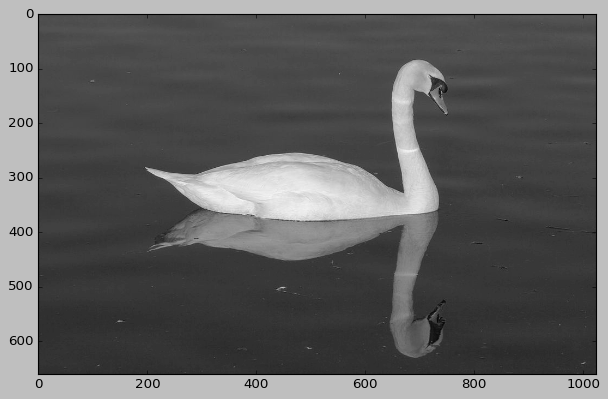

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FE569747310>


In [39]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [40]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [41]:
U.shape

(660, 660)

In [42]:
V.shape

(1024, 1024)

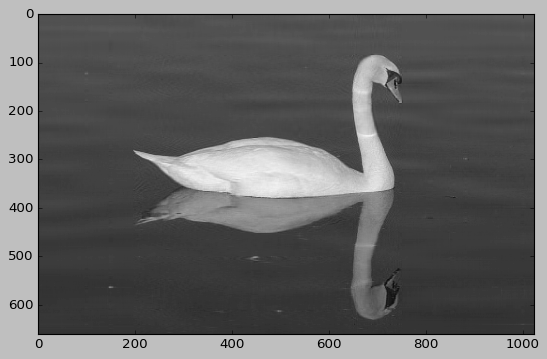

Felicidades la imagen está comprimida


In [49]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[149. 149. 149. ... 111. 114. 116.]


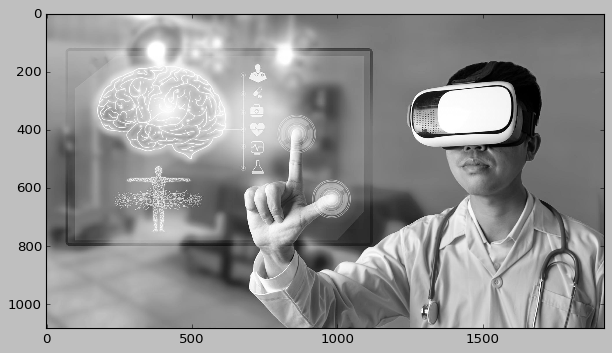

<PIL.Image.Image image mode=LA size=1920x1080 at 0x7FE55E6038D0>
********* Análisis de factores de descomposición SVD *********
Matriz Factor U: (1080, 1080)
Matriz Factor D: (1080,)
Matriz Factor V: (1920, 1920)
Nota: Por las dimensiones de la imagen podemos movernos desde 0 hasta  1080
**************************************************************
Imagen con nvalue de  50


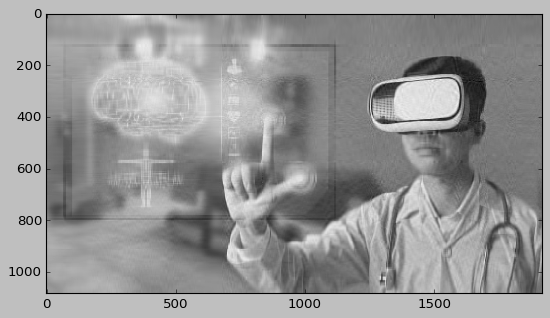

Imagen con nvalue de  100


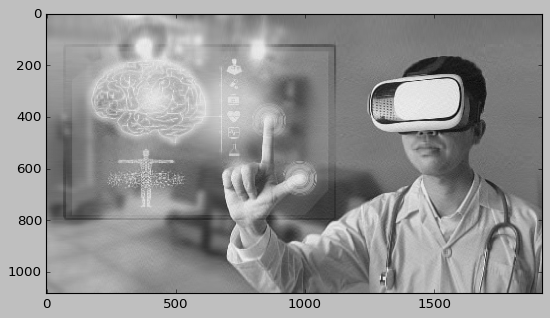

Imagen con nvalue de  150


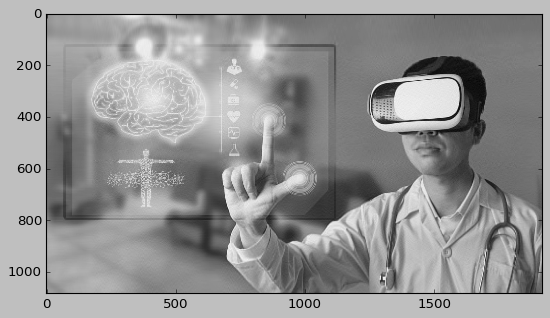

Imagen con nvalue de  200


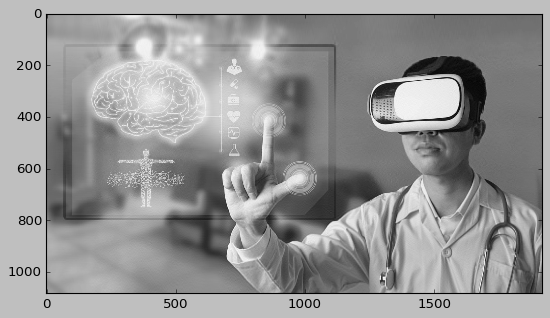

Imagen con nvalue de  250


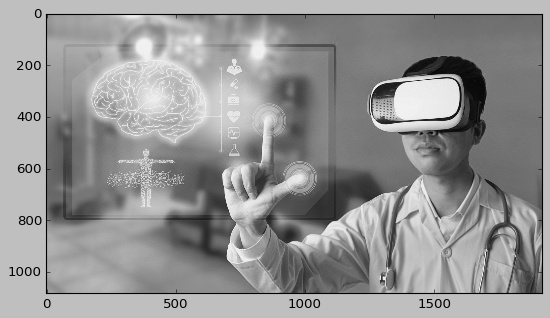

Observamos que se pudo comprimir la imagen con un nvalue de  250  manteniendo la calidad.


In [67]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://cloudfront-us-east-1.images.arcpublishing.com/infobae/5JGUHCJWYBHZTNSBWLWQZIRANI.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

#Imprimo la imagen original
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

#Visualizo los valores para determinar el factor U en el que me podría mover para garantizar la compresión de la imagen
U,D,V = np.linalg.svd(imgmat)
print("********* Análisis de factores de descomposición SVD *********")
print("Matriz Factor U:", U.shape)
print("Matriz Factor D:", D.shape)
print("Matriz Factor V:",V.shape)
print("Nota: Por las dimensiones de la imagen podemos movernos desde 0 hasta ",U.shape[0])
print("**************************************************************")

#Utilizo un ciclo con un rango de 50 en 50 para determinar el nvalue que nos permita comprimir la imagen pero garantizando la calidad original.
for i in np.arange(50, 300, 50):
  #Ajusto el valor de nvalue
  nvalue = i

  #Reconstruyo la imagen
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

  print("Imagen con nvalue de ", nvalue)

  #Imprimo y comparo la calidad durante las iteraciones
  plt.imshow(reconstimg,cmap='gray')
  plt.show()

print("Observamos que se pudo comprimir la imagen con un nvalue de ", nvalue, " manteniendo la calidad.")

[172. 172. 172. ...   1.   0.   0.]


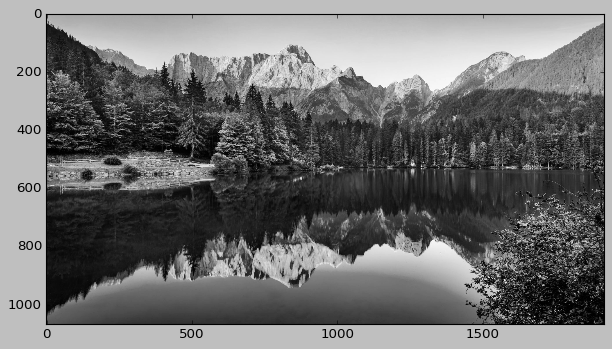

<PIL.Image.Image image mode=LA size=1920x1065 at 0x7FE55D52B1D0>
********* Análisis de factores de descomposición SVD *********
Matriz Factor U: (1065, 1065)
Matriz Factor D: (1065,)
Matriz Factor V: (1920, 1920)
Nota: Por las dimensiones de la imagen podemos movernos desde 0 hasta  1065
**************************************************************
Imagen con nvalue de  50


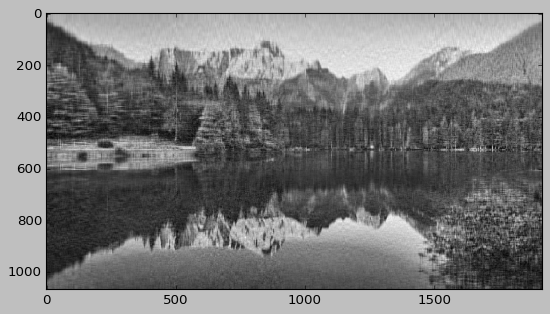

Imagen con nvalue de  100


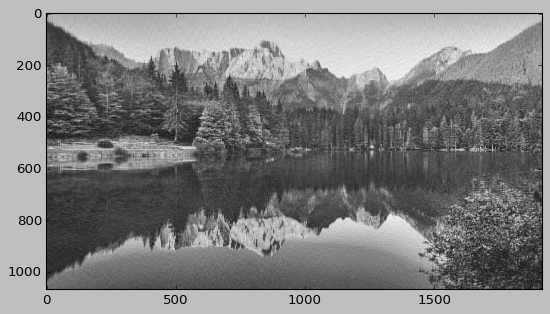

Imagen con nvalue de  150


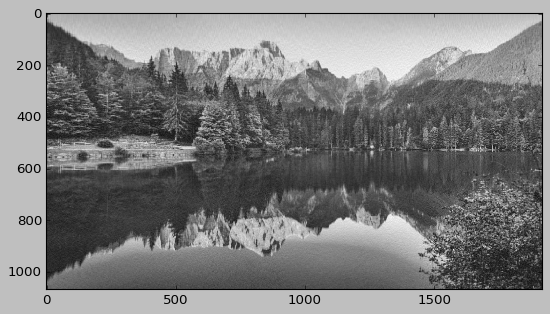

Imagen con nvalue de  200


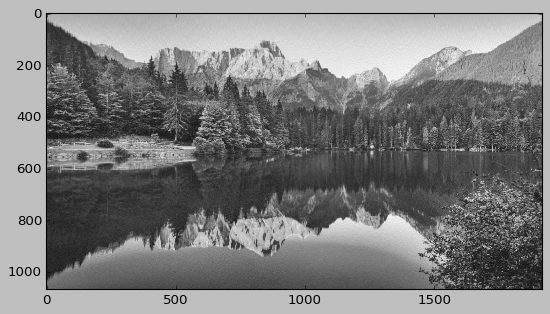

Imagen con nvalue de  250


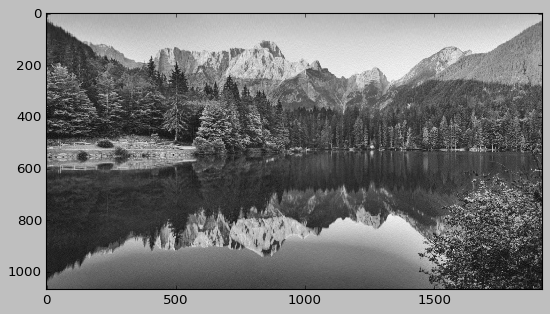

Imagen con nvalue de  300


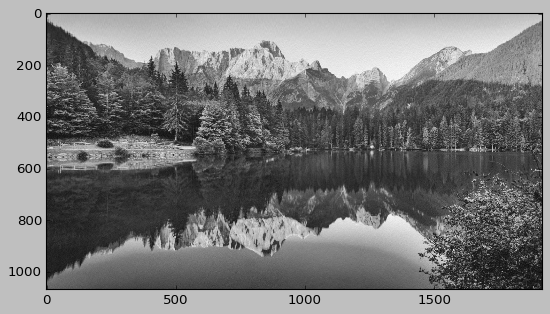

Imagen con nvalue de  350


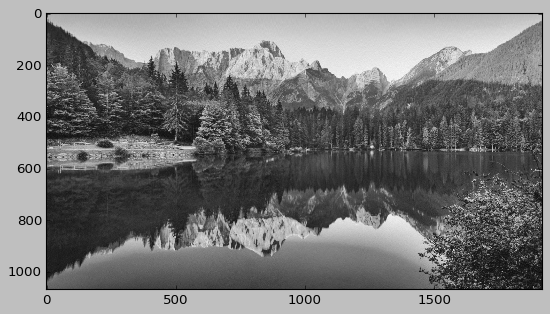

Imagen con nvalue de  400


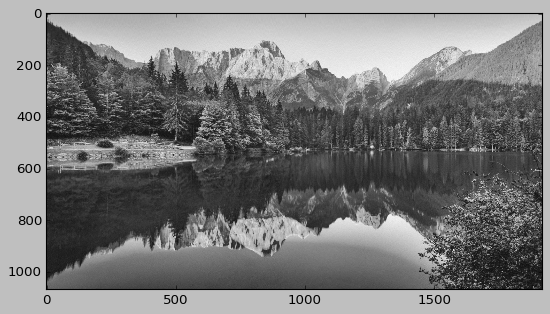

Imagen con nvalue de  450


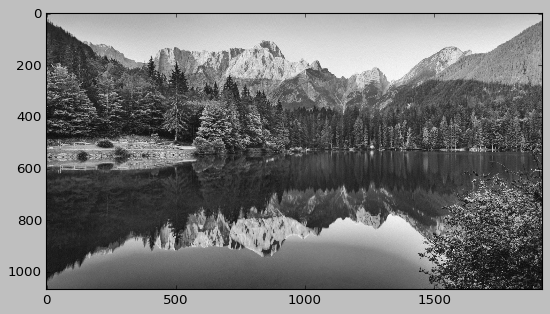

Observamos que se pudo comprimir la imagen con un nvalue de  450  manteniendo la calidad.


In [69]:
#imagen 2
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://blog.naturlider.com/wp-content/uploads/2020/03/AdobeStock_309195144-post-dia-mundial-naturaleza.jpeg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

#Imprimo la imagen original
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

#Visualizo los valores para determinar el factor U en el que me podría mover para garantizar la compresión de la imagen
U,D,V = np.linalg.svd(imgmat)
print("********* Análisis de factores de descomposición SVD *********")
print("Matriz Factor U:", U.shape)
print("Matriz Factor D:", D.shape)
print("Matriz Factor V:",V.shape)
print("Nota: Por las dimensiones de la imagen podemos movernos desde 0 hasta ",U.shape[0])
print("**************************************************************")

#Utilizo un ciclo con un rango de 50 en 50 para determinar el nvalue que nos permita comprimir la imagen pero garantizando la calidad original.
for i in np.arange(50, 500, 50):
  #Ajusto el valor de nvalue
  nvalue = i
  
  #Reconstruyo la imagen
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

  print("Imagen con nvalue de ", nvalue)

  #Imprimo y comparo la calidad durante las iteraciones
  plt.imshow(reconstimg,cmap='gray')
  plt.show()

print("Observamos que se pudo comprimir la imagen con un nvalue de ", nvalue, " manteniendo la calidad.")

[184. 184. 184. ... 240. 239. 239.]


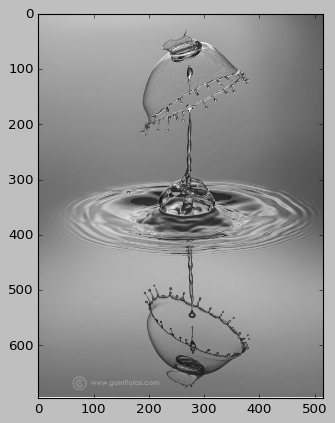

<PIL.Image.Image image mode=LA size=516x695 at 0x7FE55E529510>
********* Análisis de factores de descomposición SVD *********
Matriz Factor U: (695, 695)
Matriz Factor D: (516,)
Matriz Factor V: (516, 516)
Nota: Por las dimensiones de la imagen podemos movernos desde 0 hasta  695
**************************************************************
Imagen con nvalue de  50


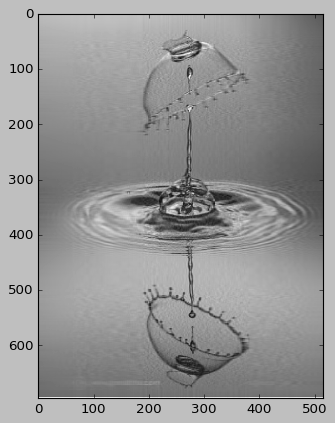

Imagen con nvalue de  100


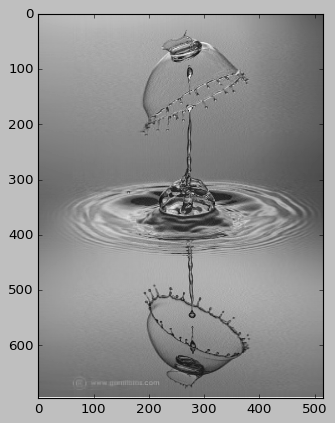

Imagen con nvalue de  150


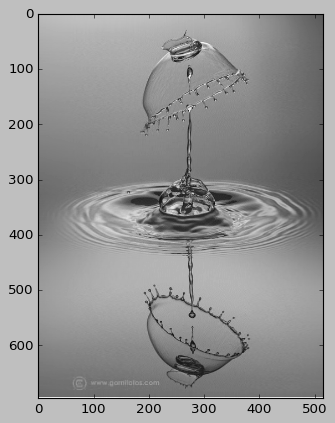

Observamos que se pudo comprimir la imagen con un nvalue de  150  manteniendo la calidad.


In [71]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://nuestroclima.com/wp-content/uploads/2017/01/Gotas-4.png')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

#Imprimo la imagen original
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

#Visualizo los valores para determinar el factor U en el que me podría mover para garantizar la compresión de la imagen
U,D,V = np.linalg.svd(imgmat)
print("********* Análisis de factores de descomposición SVD *********")
print("Matriz Factor U:", U.shape)
print("Matriz Factor D:", D.shape)
print("Matriz Factor V:",V.shape)
print("Nota: Por las dimensiones de la imagen podemos movernos desde 0 hasta ",U.shape[0])
print("**************************************************************")

#Utilizo un ciclo con un rango de 50 en 50 para determinar el nvalue que nos permita comprimir la imagen pero garantizando la calidad original.
for i in np.arange(50, 200, 50):
  #Ajusto el valor de nvalue
  nvalue = i
  
  #Reconstruyo la imagen
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

  print("Imagen con nvalue de ", nvalue)

  #Imprimo y comparo la calidad durante las iteraciones
  plt.imshow(reconstimg,cmap='gray')
  plt.show()

print("Observamos que se pudo comprimir la imagen con un nvalue de ", nvalue, " manteniendo la calidad.")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#tu codigo aqui

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 